# Import the required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
#Import cleaning functions
import utilities as ut

# Reading IMDB files

In [4]:
# Reading imdb files, making new features, and merge them
#it also returns all the list of all geners types
imdb_df, all_geners_type = ut.read_imdb_datasets()
#If you want to to get an overal insight about data 
print(imdb_df.info())
# As we can see here, there is no any null values in the dataset at this step

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615223 entries, 0 to 615222
Data columns (total 46 columns):
tconst                 615223 non-null object
ordering               615223 non-null int64
nconst                 615223 non-null object
category               615223 non-null object
job                    122305 non-null object
characters             242008 non-null object
directors              612071 non-null object
writers                546294 non-null object
primary_title          615223 non-null object
original_title         615223 non-null object
start_year             615223 non-null int64
runtime_minutes        554996 non-null float64
genres                 615223 non-null object
original_title_year    615223 non-null object
primary_title_year     615223 non-null object
first_genre            615223 non-null object
Documentary            615223 non-null float64
Biography              615223 non-null float64
War                    615223 non-null float64
Western      

# How does the imdb avergae rating change for each type of genre or content?

please note that the main data frame is kind a long format dataframe because of "nconst". In fact, there duplicated
datapoints because nconst might be different (e.g., director, actor, etc). We need this format for plotting the effect of directors and actors.

To make a plot based on genre we need to make a long format data frame and for this step we should get ride of those duplicated movies!

### Boxplot

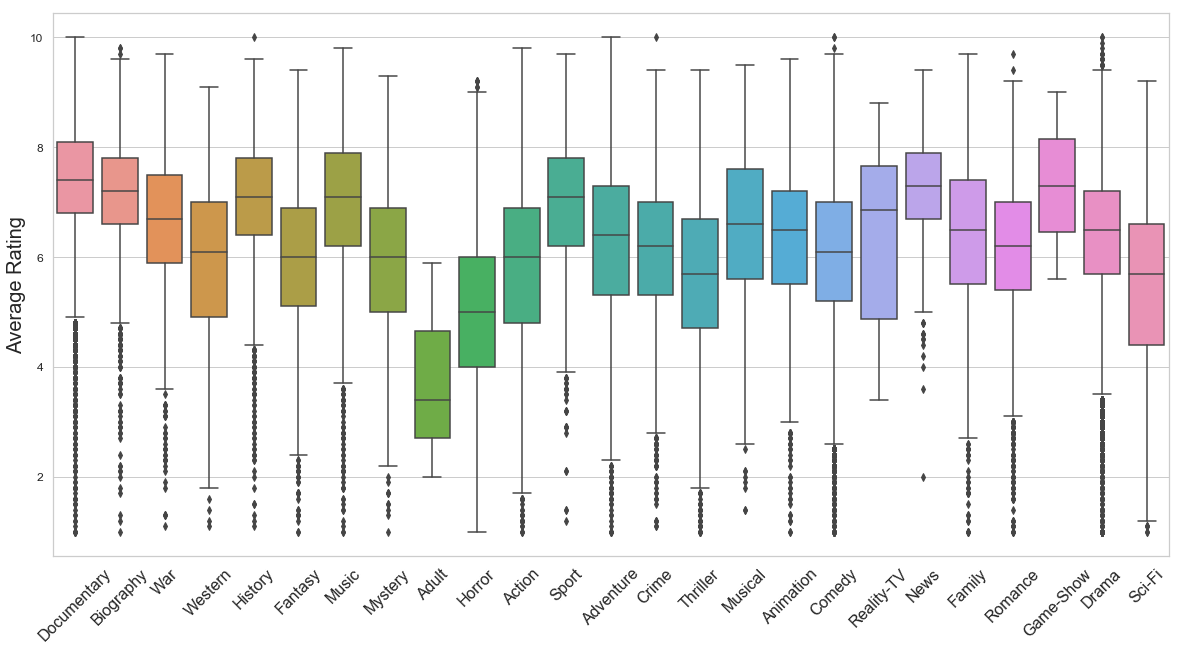

In [5]:
# To make a long format data frame
long_df = ut.make_long_df_imdb(imdb_df, ['tconst'], all_geners_type)

# To make a box plot showing the rating based on genre
plt.figure(figsize = (20, 10))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
g = sns.boxplot(x='variable', y ='value', data = long_df);
plt.xticks(fontsize = 16, rotation=45);
plt.yticks(fontsize = 12);
for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel('', fontsize=20)
    ax.set_ylabel('Average Rating', fontsize=20)

- We see the variation of scores by genre . The highest imdb_scores tend to be of the documentry type. 
- The lowest imdb score is for adult type. 
- In addition, we can see that we have a lot of outliers in most of cases

### violinplot

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


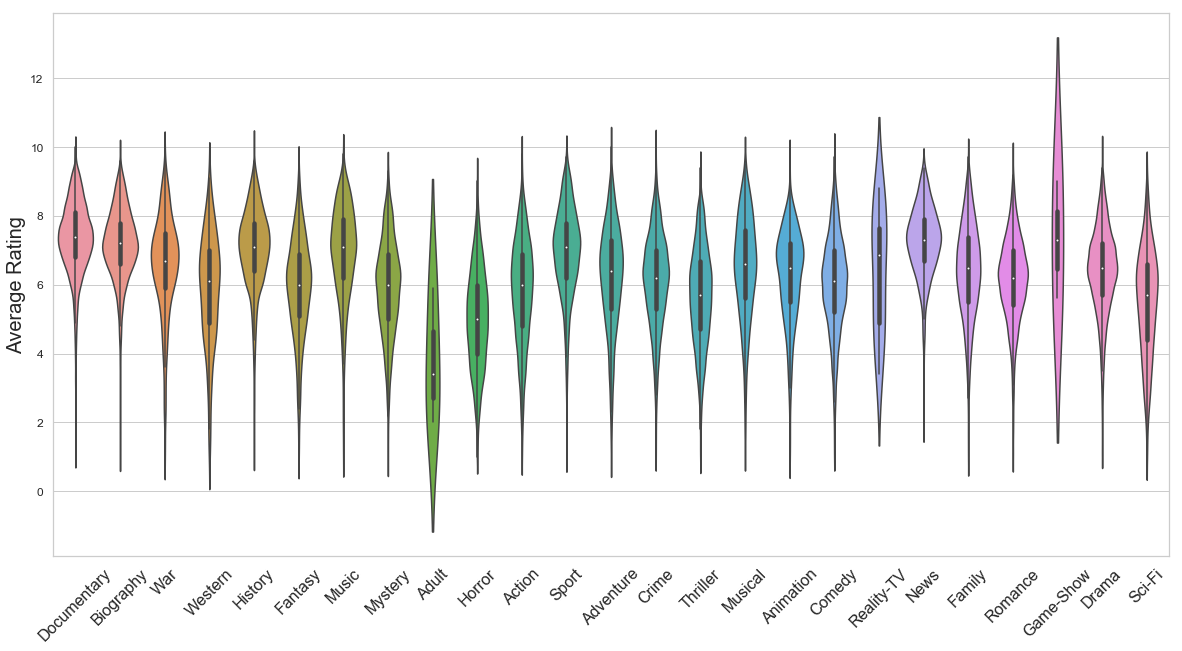

In [6]:
# To make a long format data frame
long_df = ut.make_long_df_imdb(imdb_df, ['tconst'], all_geners_type)

#Plot
plt.figure(figsize = (20, 10))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
g = sns.violinplot(x='variable', y ='value', data = long_df);
plt.xticks(fontsize = 16, rotation=45);
plt.yticks(fontsize = 12);
for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel('', fontsize=20)
    ax.set_ylabel('Average Rating', fontsize=20)

The results are the same as boxplot

### The effect of the number of genres on the rating 

Most of movies in our dataset are just have one genre. However, there are movies with more than one genre (e.g., drama and action). We want to see the effect of the number of genre on the average rating 

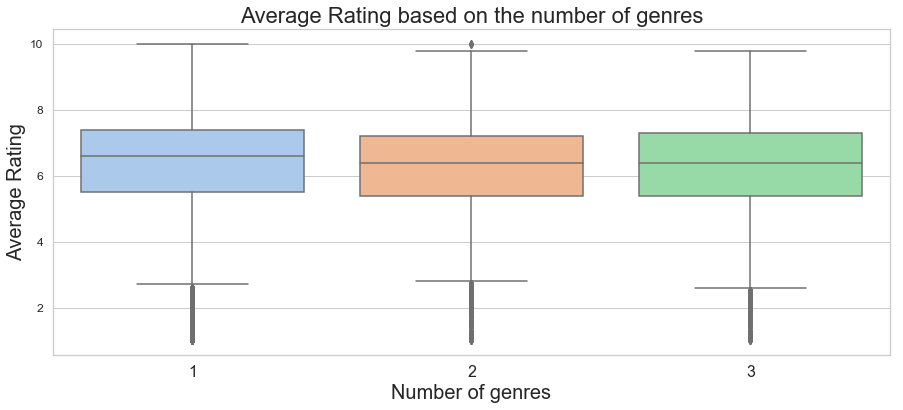

In [7]:
# To make a long format data frame
long_df = ut.make_long_df_imdb(imdb_df, ['no_genres'], ['averagerating'] )

#Making the plot
plt.figure(figsize = (15, 6))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
g = sns.boxplot(x='no_genres', y ='value',  data = long_df);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 12);
for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel('Number of genres', fontsize=20)
    ax.set_ylabel('Average Rating', fontsize=20)
plt.title('Average Rating based on the number of genres', fontsize=22);

We can see that the number of genres does not affect on the rating. Meaning having more than one content does not affect the rating. 

# Which director has the highest average imdb rating? 

Here we are going to display the top twenty directors.

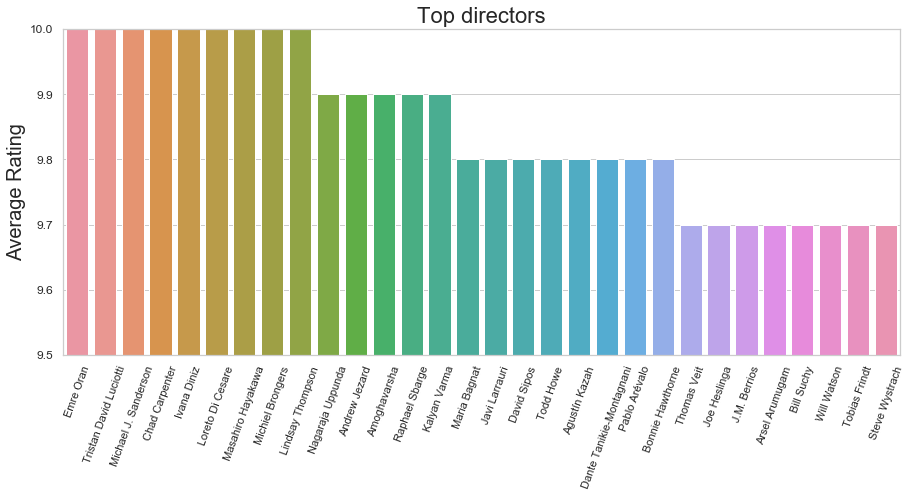

In [8]:
# Add a column including the name of directors to the data frame
imdb_df = ut.map_nconst_names(imdb_df)

# Filter the database based on category and selet just director. Here is what we are using the property
# of long format data frames

imdb_df_directors = imdb_df.loc[imdb_df['category'] == 'director']


# Lets group by the directors to find the 20 directors with the top average rating 
# We used median to remove the effect of biased values

top_directors = pd.DataFrame(imdb_df_directors.groupby('principal_name')\
                             ['averagerating'].median().sort_values(ascending = False)[:30]).reset_index()


#Plotting
plt.figure(figsize = (15, 6))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
g = sns.barplot(x = 'principal_name', y ='averagerating',  data = top_directors);
plt.yticks(fontsize = 12);
for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xticks(range(0, 30));
    ax.set_xticklabels(top_directors['principal_name'], rotation=70)
    ax.set_xlabel('', fontsize=20)
    ax.set_ylabel('Average Rating', fontsize=20)
    ax.set_ylim([9.5, 10])
plt.title('Top directors', fontsize=22);

We can see the list of directors with the highest avergae rating. 

# The effect of overall ordering on the rating

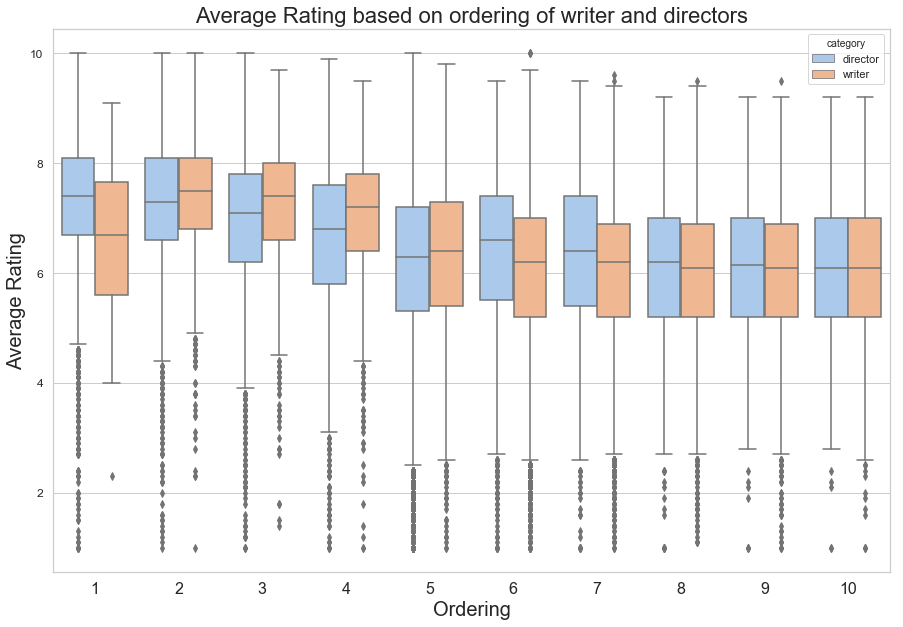

In [9]:
#Lets just fouc on writer and director
imdb_df_order = imdb_df.loc[(imdb_df['category'] == 'director') |\
                           (imdb_df['category'] == 'writer')]
#Plotting 
plt.figure(figsize = (15, 10))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
g = sns.boxplot(x='ordering', y ='averagerating', 
                   hue = 'category', data = imdb_df_order);

plt.xticks(fontsize = 16);
plt.yticks(fontsize = 12);
for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel('Ordering', fontsize=20)
    ax.set_ylabel('Average Rating', fontsize=20)
plt.title('Average Rating based on ordering of writer and directors', fontsize=22);

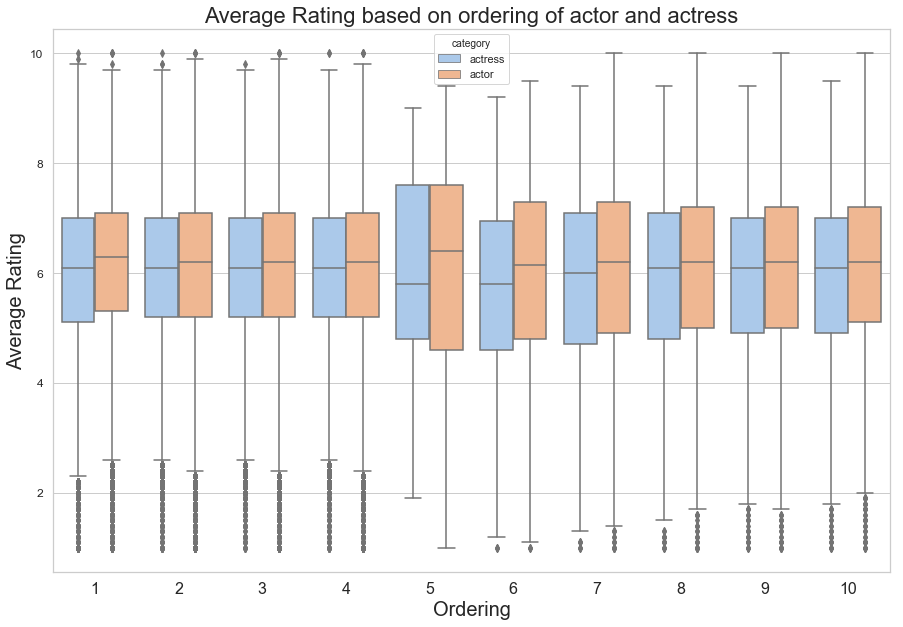

In [10]:
#Lets just fouc on actor and actress
imdb_df_order = imdb_df.loc[(imdb_df['category'] == 'actor') |\
                           (imdb_df['category'] == 'actress')]
#Plotting 
plt.figure(figsize = (15, 10))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
g = sns.boxplot(x='ordering', y ='averagerating', 
                   hue = 'category', data = imdb_df_order);

plt.xticks(fontsize = 16);
plt.yticks(fontsize = 12);
for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel('Ordering', fontsize=20)
    ax.set_ylabel('Average Rating', fontsize=20)
plt.title('Average Rating based on ordering of actor and actress', fontsize=22);

# The effect of order of director on the rating

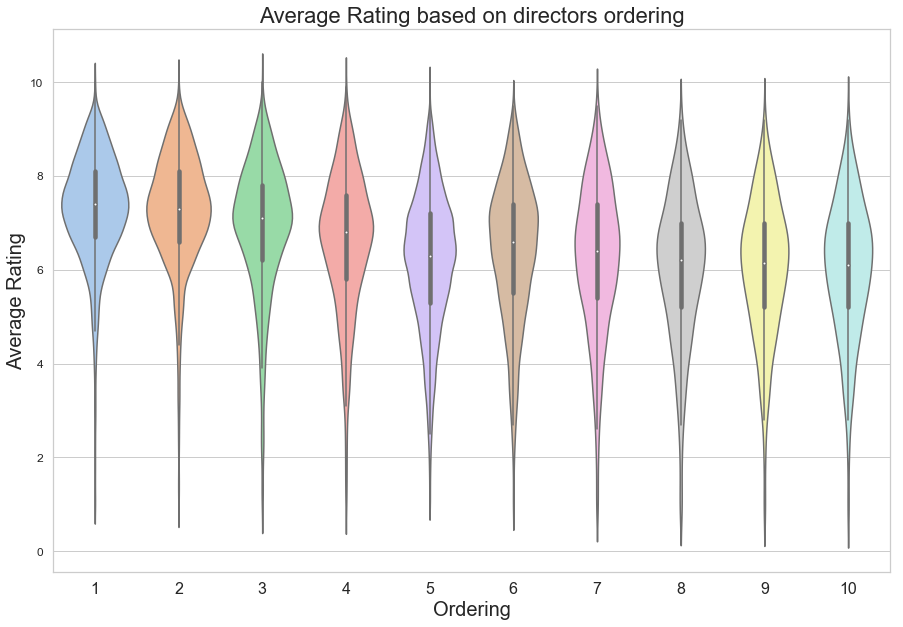

In [11]:
#Plotting 
plt.figure(figsize = (15, 10))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
#g = sns.boxplot(x='ordering', y ='averagerating',  data = imdb_df_directors);
g = sns.violinplot(x='ordering', y ='averagerating', data = imdb_df_directors);

plt.xticks(fontsize = 16);
plt.yticks(fontsize = 12);
for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel('Ordering', fontsize=20)
    ax.set_ylabel('Average Rating', fontsize=20)
plt.title('Average Rating based on directors ordering', fontsize=22);

# Which director has the highest average imdb rating with more than 5 movies? 

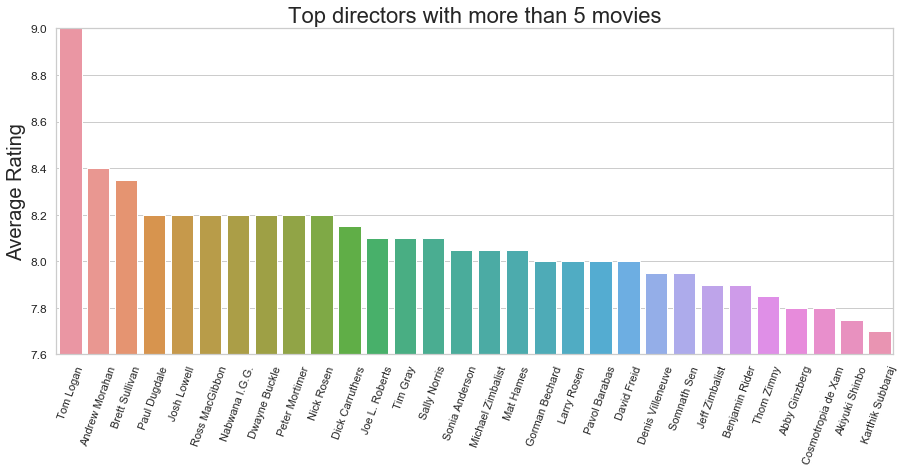

In [12]:
top_directors_5 = imdb_df_directors.groupby('principal_name')['averagerating'].agg(['median', 'count'])
top_directors_5 = top_directors_5.loc[top_directors_5['count'] > 5].\
sort_values('median', ascending = False)[:30].reset_index()

#Plotting
plt.figure(figsize = (15, 6))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
g = sns.barplot(x = 'principal_name', y ='median',  data = top_directors_5);
plt.yticks(fontsize = 12);
for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xticks(range(0, 30));
    ax.set_xticklabels(top_directors_5['principal_name'], rotation=70)
    ax.set_xlabel('')
    ax.set_ylabel('Average Rating', fontsize=20)
    ax.set_ylim([7.6, 9])
plt.title('Top directors with more than 5 movies', fontsize=22);

# Which writer has the highest average imdb rating with more than five movies? 

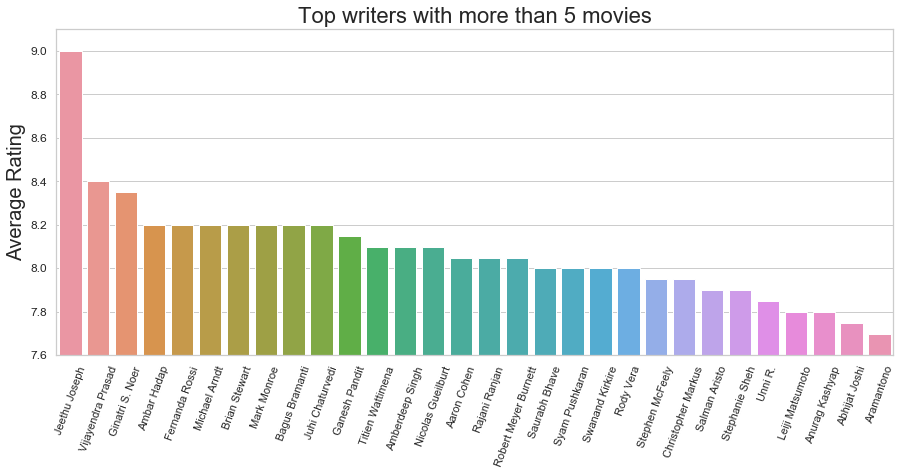

In [13]:
# Filter the database based on category and selet just writer. 

imdb_df_writer = imdb_df.loc[imdb_df['category'] == 'writer']


top_writers_5 = imdb_df_writer.groupby('principal_name')['averagerating'].agg(['median', 'count'])
top_writers_5 = top_writers_5.loc[top_writers_5['count'] > 5].\
sort_values('median', ascending = False)[:30].reset_index()

#Plotting
plt.figure(figsize = (15, 6))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
g = sns.barplot(x = 'principal_name', y ='median',  data = top_directors_5);
plt.yticks(fontsize = 12);
for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xticks(range(0, 30));
    ax.set_xticklabels(top_writers_5['principal_name'], rotation=70)
    ax.set_xlabel('', fontsize=20)
    ax.set_ylabel('Average Rating', fontsize=20)
    ax.set_ylim([7.6, 9.1])
plt.title('Top writers with more than 5 movies', fontsize=22);

# Which actor has the highest average imdb rating with more than 20 movies? 

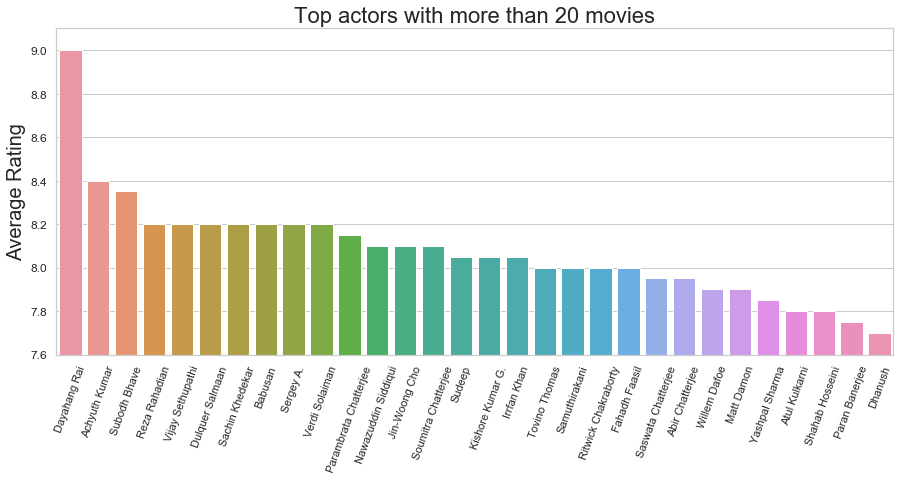

In [14]:
# Filter the database based on category and selet just actor. 

imdb_df_actor = imdb_df.loc[imdb_df['category'] == 'actor']


top_actors_5 = imdb_df_actor.groupby('principal_name')['averagerating'].agg(['median', 'count'])
top_actors_5 = top_actors_5.loc[top_actors_5['count'] > 20].\
sort_values('median', ascending = False)[:30].reset_index()

#Plotting
plt.figure(figsize = (15, 6))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
g = sns.barplot(x = 'principal_name', y ='median',  data = top_directors_5);
plt.yticks(fontsize = 12);
for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xticks(range(0, 30));
    ax.set_xticklabels(top_actors_5['principal_name'], rotation=70)
    ax.set_xlabel('', fontsize=20)
    ax.set_ylabel('Average Rating', fontsize=20)
    ax.set_ylim([7.6, 9.1])
plt.title('Top actors with more than 20 movies', fontsize=22);

# Which actress has the highest average imdb rating with more than 20 movies? 

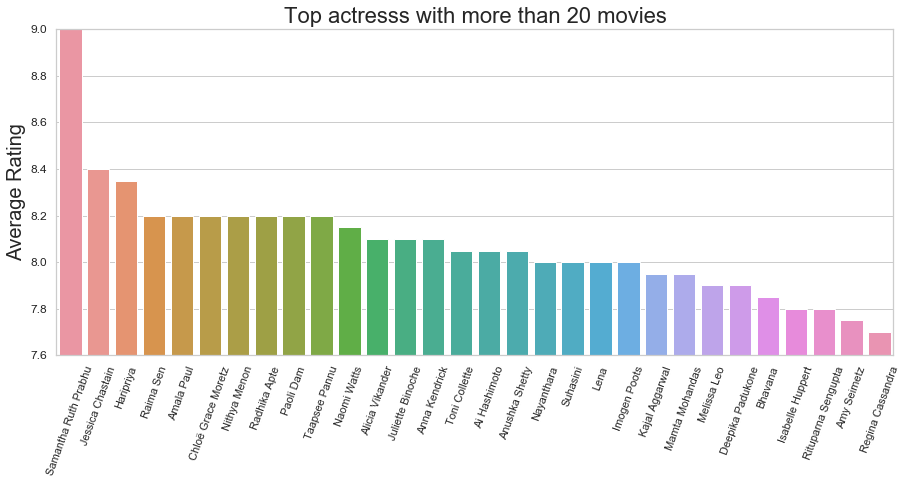

In [15]:
# Filter the database based on category and selet just actress. 

imdb_df_actress = imdb_df.loc[imdb_df['category'] == 'actress']


top_actresss_5 = imdb_df_actress.groupby('principal_name')['averagerating'].agg(['median', 'count'])
top_actresss_5 = top_actresss_5.loc[top_actresss_5['count'] > 20].\
sort_values('median', ascending = False)[:30].reset_index()

#Plotting
plt.figure(figsize = (15, 6))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
g = sns.barplot(x = 'principal_name', y ='median',  data = top_directors_5);
plt.yticks(fontsize = 12);
for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xticks(range(0, 30));
    ax.set_xticklabels(top_actresss_5['principal_name'], rotation=70)
    ax.set_xlabel('', fontsize=20)
    ax.set_ylabel('Average Rating', fontsize=20)
    ax.set_ylim([7.6, 9])
plt.title('Top actresss with more than 20 movies', fontsize=22);

# Is the number of votes  an indicator of the imdb rating? 

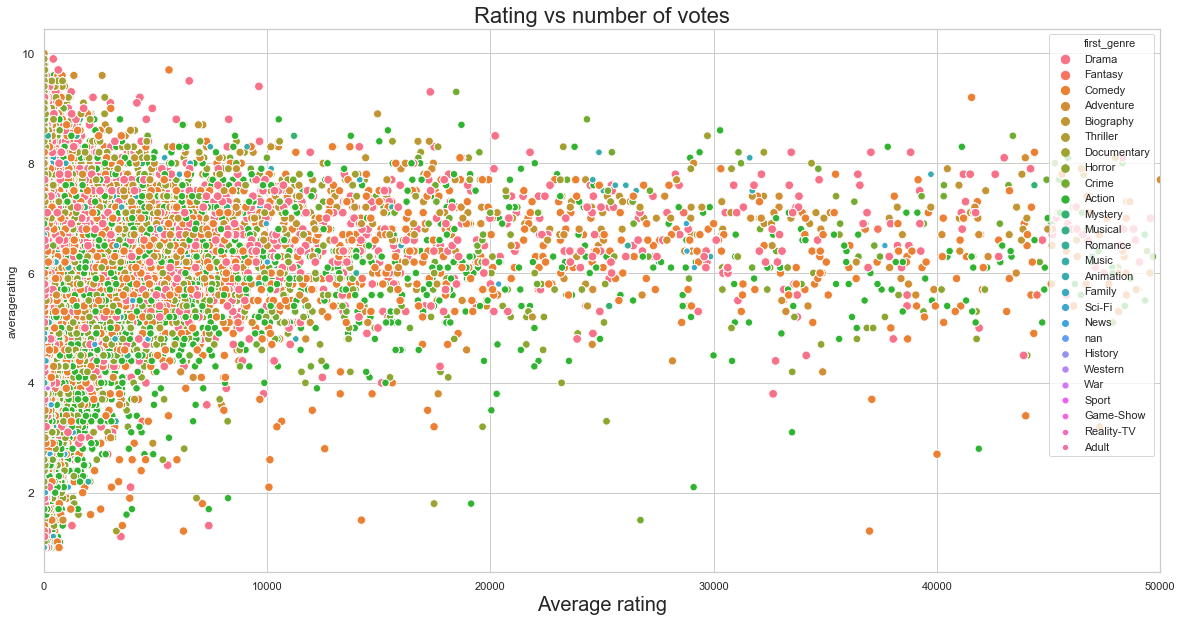

In [16]:
#Plotting
plt.figure(figsize = (20, 10))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
g = sns.scatterplot(x = 'numvotes', y = 'averagerating',
                hue = 'first_genre', size = 'first_genre', data = imdb_df)
plt.yticks(fontsize = 12);
for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel('Number of votes', fontsize=20)
    ax.set_xlabel('Average rating', fontsize=20)
    ax.set_xlim([0, 50000])
plt.title('Rating vs number of votes', fontsize=22);

In [17]:
# Now lets read the dataset about the revenue
revenue_df = ut.read_budgets()
 
#Now, we want to merge revenue_df with imdb_df
movie_df = pd.merge(imdb_df, revenue_df, how = 'inner', 
                    left_on = 'primary_title_year', right_on = 'title_year')

print('The shape of data set is ', movie_df.shape)

#And here are some information about the dataset
movie_df.info()

The shape of data set is  (20189, 60)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20189 entries, 0 to 20188
Data columns (total 60 columns):
tconst                 20189 non-null object
ordering               20189 non-null int64
nconst                 20189 non-null object
category               20189 non-null object
job                    7650 non-null object
characters             8149 non-null object
directors              20187 non-null object
writers                19704 non-null object
primary_title          20189 non-null object
original_title         20189 non-null object
start_year             20189 non-null int64
runtime_minutes        20176 non-null float64
genres                 20189 non-null object
original_title_year    20189 non-null object
primary_title_year     20189 non-null object
first_genre            20189 non-null object
Documentary            20189 non-null float64
Biography              20189 non-null float64
War                    20189 non-null float6

In [ ]:
movie_df